# Pymaceuticals Inc.
---

### Analysis

- This analysis is based off of the treatment of tumors in 248 mice with nine drugs and one placebo group. Inferences can be made about the overall effects of each, however the numbers of male vs female mice in the study were not equal, and the number of mice that used each drug were not equal. Therefore, the stats are not completely comparable.
- Capomulin and Ramicane produced the lowest mean tumor sizes and the lowest variances in tumor size. These two drugs also were used in the highest numbers of mice, which could have inflated their stats more positively. However, the differences in stats for these two drugs compared with the rest and the placebo group suggest that these two drugs are the most effective by a fair margin.
- Except for Ketapril, all of the drugs seem to be slightly more effective in reducing tumor sizes in male mice (see added violin plot). This result is also consistent with the placebo, suggesting that maybe male mice are more likely to respond to all of the drugs used except Ketapril, which may be more effective for female mice.
 

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [87]:
# Checking the number of mice.
num_mice = df["Mouse ID"].nunique()
num_mice

249

In [88]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows
# Asked Xpert

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask2 = df["Mouse ID"] != "g989"
df2 = df.loc[mask2].reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [91]:
# Checking the number of mice in the clean DataFrame.
num_mice_2 = df2["Mouse ID"].nunique()
num_mice_2

248

In [92]:
df2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_stdev = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = df2.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

data = {
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_stdev,
    "Tumor Volume Std. Error": tumor_sem
}
drug_stats = pd.DataFrame(data)
drug_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [94]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_stats_again = df2.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_stats_again

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [95]:
drugs_df = df2["Drug Regimen"].value_counts().reset_index()
drugs_df.columns = ["Drug Regimen", "Timepoint Count"]
drugs_df

,Drug Regimen,Timepoint Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


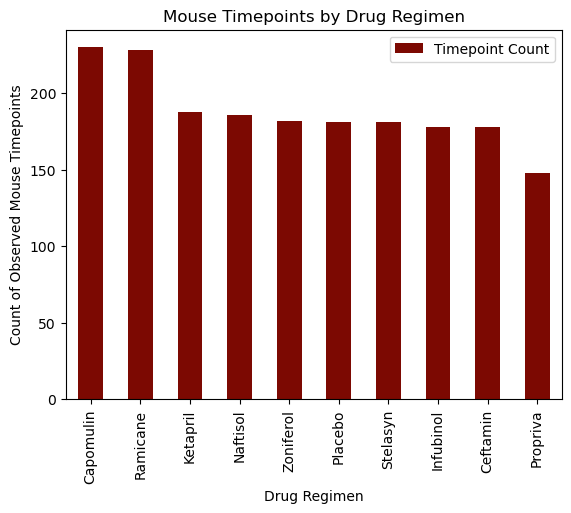

In [151]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs_df.plot(kind="bar", x="Drug Regimen", y="Timepoint Count", xlabel="Drug Regimen", 
           ylabel="Count of Observed Mouse Timepoints", title="Mouse Timepoints by Drug Regimen", 
           color="#7C0902")
plt.show()

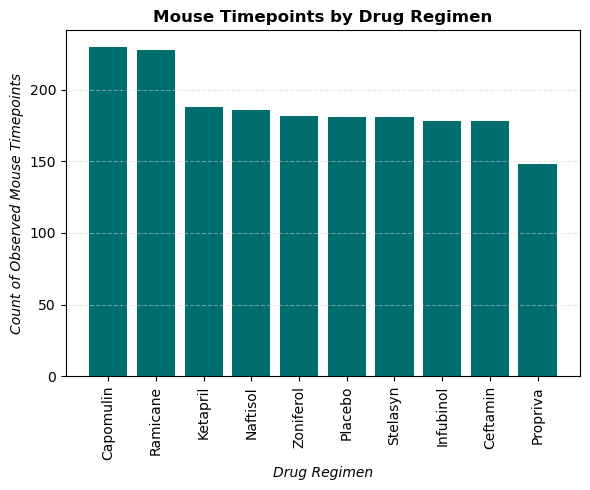

In [153]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x = drugs_df["Drug Regimen"]
y = drugs_df["Timepoint Count"]
# Could also use data = df2["Drug Regimen"].value_counts(), x = data.index, y = data.values

plt.figure(figsize=(6, 5))

# skeleton chart
plt.bar(x, y, color="#006D6F")

# Customization
plt.ylabel("Count of Observed Mouse Timepoints", fontsize=10, fontstyle="italic")
plt.xlabel("Drug Regimen", fontsize=10, fontstyle="italic")
plt.xticks(rotation="vertical")
plt.title("Mouse Timepoints by Drug Regimen", fontsize=12, fontweight="bold")

plt.grid(color="lightgrey", axis="y", alpha=0.5, linestyle="--")

plt.show
plt.tight_layout()

In [168]:
sex = df2["Sex"].value_counts()
sex

Sex
Male      958
Female    922
Name: count, dtype: int64

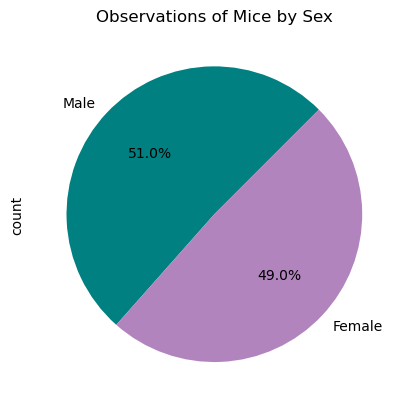

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = df2["Sex"].value_counts()
colors = ["#008080", "#B284BE"]
labels = df2["Sex"].unique() #sex.index.values

sex.plot(kind="pie", labels=labels, autopct='%1.1f%%', title="Observations of Mice by Sex", colors=colors, startangle=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

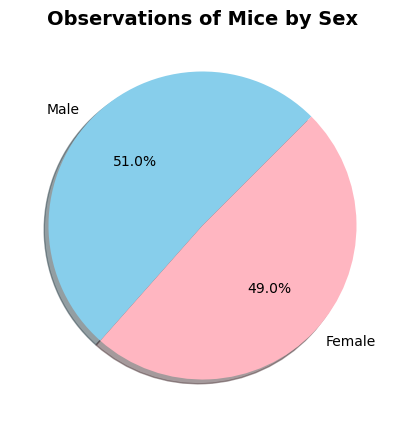

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = df2["Sex"].value_counts()
colors = ["skyblue", "lightpink"]
labels = df2["Sex"].unique()

plt.figure(figsize=(6, 5))

# Make plot
plt.pie(sex, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)

# Customizations
plt.title("Observations of Mice by Sex", fontweight="bold", fontsize=14)
plt.axis=("equal")

plt.show

## Quartiles, Outliers and Boxplots

In [40]:
import seaborn as sns
import numpy as np

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
longest_times = df2.groupby(["Mouse ID"])["Timepoint"].max()
longest_times = longest_times.rename("Max Timepoint")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3 = pd.merge(df2,  longest_times, on=["Mouse ID"])
final_tumor_df = df3.loc[df3["Timepoint"] == df3["Max Timepoint"]].reset_index(drop=True)

mask3 = final_tumor_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
box_data = final_tumor_df[mask3].reset_index(drop=True)
box_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,45,22.050126,1,45
1,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,m601,Capomulin,Male,22,17,45,28.430964,1,45
4,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3,45
96,y163,Infubinol,Female,17,27,45,67.685569,3,45
97,y769,Ceftamin,Female,6,27,45,68.594745,4,45
98,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [127]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_tumor_vol = box_data.loc[box_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(max_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    #quartiles = max_tumor_vol.quantiles9[.25, 5, .75])
    Q1 = np.percentile(max_tumor_vol, 25) # quantiles[0.25]
    Q3 = np.percentile(max_tumor_vol, 75) # quantiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    outliers = max_tumor_vol.loc[(max_tumor_vol < lower_bound) | (max_tumor_vol > upper_bound)]
    print(f"\n Max tumor volume outliers for {drug}: {outliers.count()}")
    if outliers.count() > 0:
        print(f"Mean and outlier value for {drug}: {outliers}")


 Max tumor volume outliers for Capomulin: 0

 Max tumor volume outliers for Ramicane: 0

 Max tumor volume outliers for Infubinol: 1
Mean and outlier value for Infubinol: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64

 Max tumor volume outliers for Ceftamin: 0


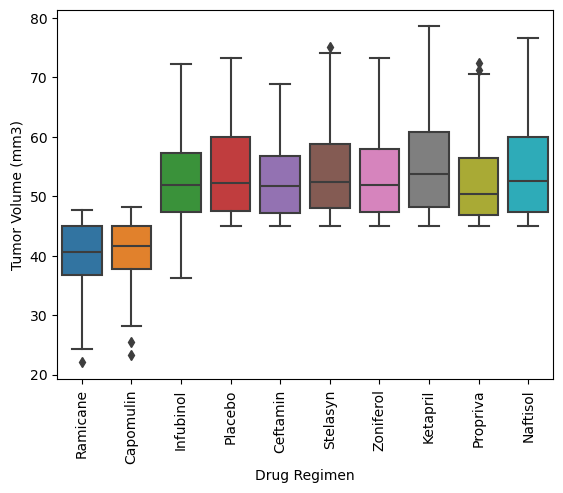

In [170]:
# Sample box plot of all drug regimens

sns.boxplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.xticks(rotation=90)
plt.show()

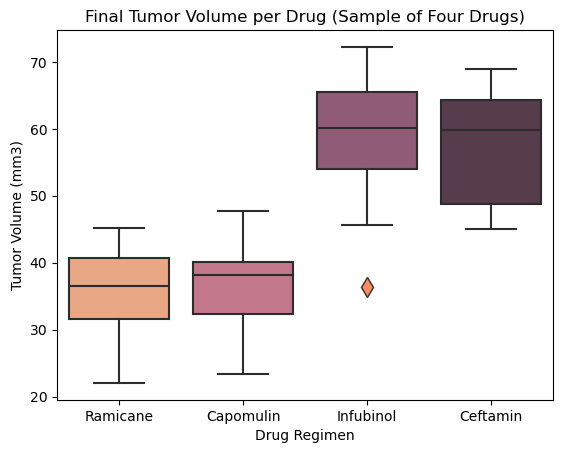

In [136]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
colors = ["#faa275", "#ce6a85", "#985277", "#5c374c"]
sns.boxplot(data=box_data, x="Drug Regimen", y="Tumor Volume (mm3)", palette=colors, flierprops={"markerfacecolor":"#ff8c61", "markersize": 10})

# Set x/y label, title
plt.title("Final Tumor Volume per Drug (Sample of Four Drugs)")
plt.show()

## Line and Scatter Plots

In [138]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_data = df2["Mouse ID"] == "s185"
line_tumor_vol = df2.loc[line_data]["Tumor Volume (mm3)"]
line_tumor_vol

10    45.000000
11    43.878496
12    37.614948
13    38.177232
14    36.866876
15    33.949940
16    32.959671
17    28.328531
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

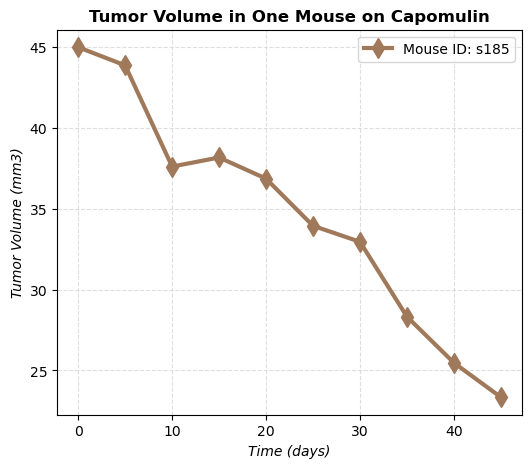

In [149]:
x = df2.loc[line_data]["Timepoint"]
y = line_tumor_vol

plt.figure(figsize=(6, 5))

plt.plot(x, y, color="#A0785A", linewidth=3, marker="d", markersize=10, label="Mouse ID: s185")

plt.xlabel("Time (days)", fontsize=10, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=10, fontstyle="italic")
plt.title("Tumor Volume in One Mouse on Capomulin", fontsize=12, fontweight="bold")
plt.legend()
plt.grid(color="lightgrey", linestyle="--", alpha=0.75)

# Show/save graph
plt.show

In [140]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]
capomulin_data = capomulin_df.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
capomulin_data

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


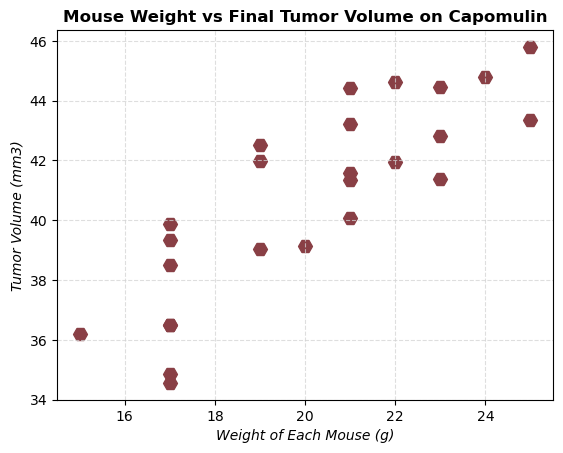

In [162]:
x = capomulin_data["Weight (g)"]
y = capomulin_data["Tumor Volume (mm3)"]

plt.scatter(x, y, color="#893F45", marker="H", s=100)
plt.xlabel("Weight of Each Mouse (g)", fontsize=10, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=10, fontstyle="italic")
plt.title("Mouse Weight vs Final Tumor Volume on Capomulin", fontsize=12, fontweight="bold")

plt.grid(color="lightgrey", linestyle="--", alpha=0.75)
plt.show()

## Correlation and Regression

In [158]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Regression/Modelling libraries
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [159]:
corrs = capomulin_data.corr(numeric_only = True)
corrs

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


The correlation coefficient (r^2) is: 0.7088568047708723


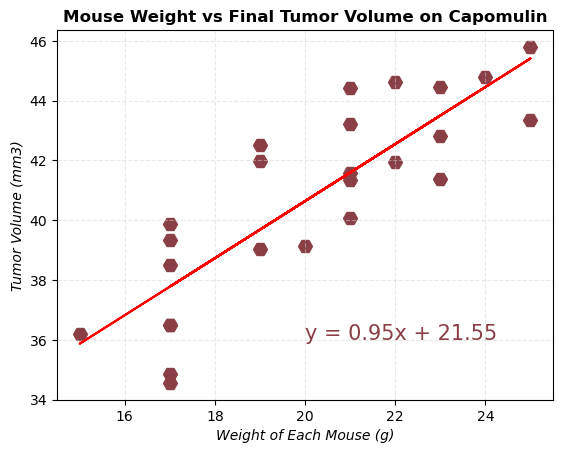

In [167]:
x_values = capomulin_data["Weight (g)"]
y_values = capomulin_data["Tumor Volume (mm3)"]

# Line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values, y_values, color="#893F45", marker="H", s=100)
plt.plot(x_values, regress_values, "r-") # plot the line of best fit

# Customizations
plt.xlabel("Weight of Each Mouse (g)", fontsize=10, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=10, fontstyle="italic")
plt.title("Mouse Weight vs Final Tumor Volume on Capomulin", fontsize=12, fontweight="bold")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(20, 36),fontsize=15,color="#893F45")

print(f"The correlation coefficient (r^2) is: {rvalue**2}")
plt.show()

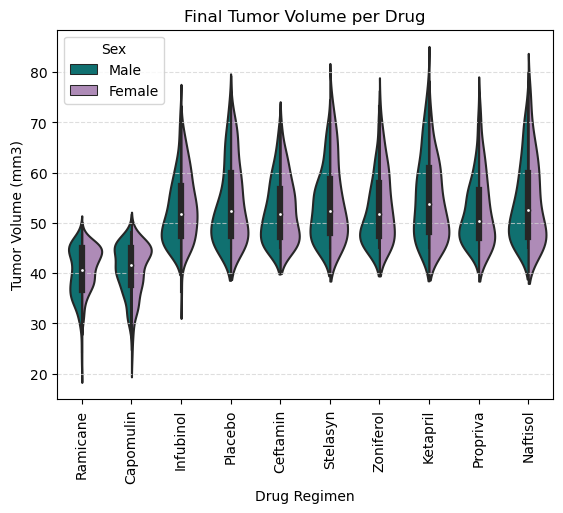

In [176]:
## Added Violin Plot to Compare Results by Sex of Mouse

colors = ["#008080", "#B284BE"]
sns.violinplot(data=df2, x="Drug Regimen", y="Tumor Volume (mm3)", hue="Sex", palette=colors, split=True)
plt.xticks(rotation=90)

# Customize
plt.title("Final Tumor Volume per Drug")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.75)

# Show
plt.show()